# Wine dataset classification

In [24]:
import configparser
import numpy as np
import pandas as pd
import logging
import coloredlogs

import aux_functions as aux
from decisiontree import Node


In [25]:
N_SPLITS = 10  # number of cross-validation splits (folds)

In [26]:
# read the configuration file
config = configparser.ConfigParser()
config.read("config.ini")

# configure logger
logger = logging.getLogger(__name__)
coloredlogs.install(level=config['Logging']['level'], logger=logger.parent)

In [27]:
%matplotlib inline

2019-11-09 10:28:27 LAPTOP-0NHMJ67U matplotlib.pyplot[8800] DEBUG Loaded backend module://ipykernel.pylab.backend_inline version unknown.


## Load the dataset
a) load data headers

In [4]:
data_headers_fname = config['Data']['data_headers']
data_headers_fname


'./wine_data_headers.txt'

In [5]:
# strip 3 initial characters (row number + closing bracket + optional whitespace)
headers = np.loadtxt(data_headers_fname, dtype=str, delimiter='\n', converters={0: lambda attr: attr[3:]})
headers


array(['Class ID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype='<U28')

b) load the data

In [6]:
data_fname = config['Data']['data_file']
data_fname

'./wine_data.txt'

In [7]:
df_input = pd.read_csv(data_fname, names=headers)
df_input.head()

,Class ID,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Decision tree classification
### Define exemplary decision tree


In [8]:
tree = Node(df_input, target_column=int(config['Data']['target_column']))
tree.learn(max_depth=5)

2019-11-09 09:40:23 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node []
2019-11-09 09:40:23 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 09:40:23 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.54 (at threshold 12.7)
2019-11-09 09:40:23 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.27 (at threshold 2.33)
2019-11-09 09:40:23 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.14 (at threshold 2.07)
2019-11-09 09:40:24 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.25 (at threshold 17.6)
2019-11-09 09:40:24 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.26 (at threshold 88)
2019-11-09 09:40:24 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.45 (at threshold 2.05)
2019-11-

2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.055 (at threshold 1.23)
2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.055 (at threshold 0.215)
2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.19 (at threshold 0.725)
2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.19 (at threshold 3.7)
2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.055 (at threshold 0.525)
2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.055 (at threshold 1.29)
2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.055 (at threshold 426)
2019-11-09 09:40:28 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute

2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Magnesium (expected gain: 0.05)
2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Magnesium' with threshold: 98
2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [1, 0]
2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node [1, 0, 1]
2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 3 tree node (for 98.0 < Magnesium <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.02 (at threshold 11.5)
2019-11-09 09:40:32 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.02 (at threshold 1.21)
2019-11-09 09:40:32 LAPTOP-0NHMJ

2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.079 (at threshold 1.04)
2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.079 (at threshold 1.82)
2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.079 (at threshold 15.7)
2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.079 (at threshold 91)
2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.079 (at threshold 2.05)
2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.079 (at threshold 2)
2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.079 (at threshold 0.17)
2019-11-09 09:40:34 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', bes

In [9]:
tree.depth

5

In [10]:
tree.print_terminal_labels()

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 4 node, [0, 1, 1, 0]: class 2 ([2])
Level 5 node, [0, 1, 1, 1, 0]: class 2 ([2])
Level 5 node, [0, 1, 1, 1, 1]: class 3 ([3, 3, 3, 3, 3, 3, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 4 node, [1, 0, 1, 0]: class 1 ([1])
Level 4 node, [1, 0, 1, 1]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2])
Level 4 node, [1, 1, 0, 0]: class 1 ([1])
Level 5 node, [1, 1, 0, 1, 0]: class 2 ([2])
Level 5 node, [1, 1, 0, 1, 1]: class 2 ([1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [11]:
tree.prune(min_points=2)

2019-11-09 09:40:35 LAPTOP-0NHMJ67U decisiontree[8800] INFO Pruning at node [0, 1, 1]
2019-11-09 09:40:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Undoing split at node [0, 1, 1]
2019-11-09 09:40:35 LAPTOP-0NHMJ67U decisiontree[8800] INFO Pruning at node [1, 0, 1]
2019-11-09 09:40:36 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Undoing split at node [1, 0, 1]
2019-11-09 09:40:36 LAPTOP-0NHMJ67U decisiontree[8800] INFO Pruning at node [1, 1, 0]
2019-11-09 09:40:36 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Undoing split at node [1, 1, 0]


In [12]:
tree.depth

3

In [13]:
tree.print_terminal_labels()

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 3 node, [0, 1, 1]: class 3 ([3, 3, 2, 3, 3, 3, 3, 2, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 0, 1]: class 2 ([2, 1, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 1, 0]: class 2 ([1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Parameter tuning
Tune parameters: maximal tree depth and minimal number of samples required per leaf. Use 10-fold cross-validation.

In [14]:
tree_params = dict(max_depth=range(3, 10), min_points=range(1, 5))
all_results, best_result = aux.tune_params(aux.cross_validate_tree, tree_params, func_args=(N_SPLITS, df_input),
                                           scoring_metrics='f1_score')

0it [00:00, ?it/s]2019-11-09 09:40:36 LAPTOP-0NHMJ67U aux_functions[8800] INFO Decision tree learning and testing with 10-fold cross validation

0it [00:00, ?it/s]2019-11-09 09:40:36 LAPTOP-0NHMJ67U aux_functions[8800] INFO Cross-validation round 0 with 160 train samples and 18 test samples
2019-11-09 09:40:36 LAPTOP-0NHMJ67U aux_functions[8800] DEBUG Test indices: [  5   7  18  33  54  55  63  80  90  98 106 121 123 141 146 151 160 168]
2019-11-09 09:40:36 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node []
2019-11-09 09:40:36 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 09:40:37 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.54 (at threshold 12.7)
2019-11-09 09:40:37 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.27 (at threshold 2.33)
2019-11-09 09:40:37 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute

2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.19 (at threshold 16.4)
2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.19 (at threshold 91.5)
2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.055 (at threshold 1.35)
2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.055 (at threshold 1.23)
2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.055 (at threshold 0.215)
2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.19 (at threshold 0.725)
2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.19 (at threshold 3.7)
2019-11-09 09:40:44 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hu

2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.039 (at threshold 0.86)
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.015 (at threshold 2.83)
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.044 (at threshold 594)
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Magnesium (expected gain: 0.05)
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Magnesium' with threshold: 98
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [1, 0]
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node [1, 0, 1]
2019-11-09 09:40:48 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split at

2019-11-09 09:40:50 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 4 tree node (for 1.385 < Proanthocyanins <= inf, trace: [1, 1, 0, 1]); not resolved with 0 children
2019-11-09 09:40:50 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.079 (at threshold 12)
2019-11-09 09:40:50 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.079 (at threshold 1.04)
2019-11-09 09:40:50 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.079 (at threshold 1.82)
2019-11-09 09:40:50 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.079 (at threshold 15.7)
2019-11-09 09:40:50 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.079 (at threshold 91)
2019-11-09 09:40:51 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.079 (at threshold 2.05)
2019-11-09 09:40:51 LAPTOP-0NHMJ67U decis

2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 2 tree node (for 3.5 < Color intensity <= inf, trace: [0, 1]); not resolved with 0 children
2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.085 (at threshold 11.8)
2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.14 (at threshold 2.42)
2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.085 (at threshold 1.97)
2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.085 (at threshold 16.4)
2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.044 (at threshold 100)
2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.024 (at threshold 1.4)
2019-11-09 09:40:55 LAPTOP-0NHMJ67U decisiontree

2019-11-09 09:40:57 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.24 (at threshold 2.38)
2019-11-09 09:40:57 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.34 (at threshold 2.39)
2019-11-09 09:40:58 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.1 (at threshold 0.36)
2019-11-09 09:40:58 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.038 (at threshold 1.62)
2019-11-09 09:40:58 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.52 (at threshold 3.37)
2019-11-09 09:40:58 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.058 (at threshold 0.86)
2019-11-09 09:40:58 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.1 (at threshold 2.49)
2019-11-09 09:40:58 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'P

2019-11-09 09:41:01 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.17 (at threshold 1e+03)
2019-11-09 09:41:01 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Color intensity (expected gain: 0.278)
2019-11-09 09:41:01 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Color intensity' with threshold: 3.9
2019-11-09 09:41:01 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [1, 1]
2019-11-09 09:41:02 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node [1, 1, 0]
2019-11-09 09:41:02 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 3 tree node (for -inf < Color intensity <= 3.915, trace: [1, 1, 0]); not resolved with 0 children
2019-11-09 09:41:02 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.085 (at threshold 12)
2019-11-09 09:41:02 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.085 (at threshold 1.04)
20

2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.59 (at threshold 2.31)
2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.61 (at threshold 755)
2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Flavanoids (expected gain: 0.647)
2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Flavanoids' with threshold: 1.6
2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node []
2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node [0]
2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 1.57, trace: [0]); not resolved with 0 children
2019-11-09 09:41:05 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.25 (at threshold 12.7)
2019-11-09 09:41:0

2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.28 (at threshold 12.3)
2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.043 (at threshold 1.35)
2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.28 (at threshold 2.17)
2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.28 (at threshold 17.4)
2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.28 (at threshold 92)
2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.043 (at threshold 1.35)
2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.043 (at threshold 1.23)
2019-11-09 09:41:08 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is

2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.02 (at threshold 0.27)
2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.02 (at threshold 1.04)
2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.02 (at threshold 2.07)
2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.02 (at threshold 0.785)
2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.02 (at threshold 2.37)
2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.02 (at threshold 350)
2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Alcalinity of ash (expected gain: 0.503)
2019-11-09 09:41:12 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Alcali

2019-11-09 09:41:14 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 09:41:14 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [1, 1, 0, 1]
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800] INFO Reached the maximal depth (at [1, 1, 0, 1, 0]) - no further splitting
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800] INFO Reached the maximal depth (at [1, 1, 0, 1, 1]) - no further splitting
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800] INFO Node [1, 1, 1] is an uniform node - no further splitting
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800] INFO Pruning at node [0, 1, 1]
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Undoing split at node [0, 1, 1]
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800] INFO Pruning at node [1, 0, 1]
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Undoing split at node [1, 0, 1]
2019-11-09 09:41:15 LAPTOP-0NHMJ67U decisiontree[8800

2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Flavanoids (expected gain: 0.15)
2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Flavanoids' with threshold: 1.2
2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [0, 1]
2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] INFO Node [0, 1, 0] is an uniform node - no further splitting
2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node [0, 1, 1]
2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 3 tree node (for 1.21 < Flavanoids <= inf, trace: [0, 1, 1]); not resolved with 0 children
2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.19 (at threshold 11.8)
2019-11-09 09:41:19 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.055 (at threshold 1.35)
2019-11-09 09:41:19 LAPTOP-

2019-11-09 09:41:22 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.015 (at threshold 2.21)
2019-11-09 09:41:22 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.044 (at threshold 18.3)
2019-11-09 09:41:22 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.05 (at threshold 98)
2019-11-09 09:41:22 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.026 (at threshold 2.49)
2019-11-09 09:41:22 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.027 (at threshold 2.26)
2019-11-09 09:41:22 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.023 (at threshold 0.32)
2019-11-09 09:41:23 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.015 (at threshold 1.47)
2019-11-09 09:41:23 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensit

2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.085 (at threshold 2.91)
2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.085 (at threshold 1.02)
2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.085 (at threshold 2.47)
2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.085 (at threshold 712)
2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Proanthocyanins (expected gain: 0.111)
2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Proanthocyanins' with threshold: 1.4
2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [1, 1, 0]
2019-11-09 09:41:25 LAPTOP-0NHMJ67U decisiontree[8800] INFO Node [1, 1, 0, 0] is an uniform node - no further splitting
2019-11-09 09:41:25 

2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.041 (at threshold 1.54)
2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.51 (at threshold 3.5)
2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.39 (at threshold 0.96)
2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.19 (at threshold 2.12)
2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.079 (at threshold 498)
2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Color intensity (expected gain: 0.505)
2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Color intensity' with threshold: 3.5
2019-11-09 09:41:29 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [0]
2019-11-09 09:41:

2019-11-09 09:41:31 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [0, 1, 1, 1]
2019-11-09 09:41:31 LAPTOP-0NHMJ67U decisiontree[8800] INFO Reached the maximal depth (at [0, 1, 1, 1, 0]) - no further splitting
2019-11-09 09:41:31 LAPTOP-0NHMJ67U decisiontree[8800] INFO Reached the maximal depth (at [0, 1, 1, 1, 1]) - no further splitting
2019-11-09 09:41:31 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node [1]
2019-11-09 09:41:31 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 1 tree node (for 1.57 < Flavanoids <= inf, trace: [1]); not resolved with 0 children
2019-11-09 09:41:31 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.59 (at threshold 13)
2019-11-09 09:41:32 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.12 (at threshold 1.44)
2019-11-09 09:41:32 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.1 (at threshold 1.98)
20

2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.086 (at threshold 2.2)
2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.033 (at threshold 16.9)
2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.18 (at threshold 134)
2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.055 (at threshold 2.05)
2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.11 (at threshold 2.92)
2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.055 (at threshold 0.15)
2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.016 (at threshold 2.86)
2019-11-09 09:41:35 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity

2019-11-09 09:41:37 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.27 (at threshold 2.33)
2019-11-09 09:41:37 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.14 (at threshold 2.07)
2019-11-09 09:41:38 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.25 (at threshold 17.6)
2019-11-09 09:41:38 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.26 (at threshold 88)
2019-11-09 09:41:38 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.45 (at threshold 2.05)
2019-11-09 09:41:38 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.65 (at threshold 1.57)
2019-11-09 09:41:38 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.21 (at threshold 0.34)
2019-11-09 09:41:38 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best ga

2019-11-09 09:41:41 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.19 (at threshold 3.7)
2019-11-09 09:41:41 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.055 (at threshold 0.525)
2019-11-09 09:41:41 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.055 (at threshold 1.29)
2019-11-09 09:41:42 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proline', best gain is 0.055 (at threshold 426)
2019-11-09 09:41:42 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Chosen attribute: Alcohol (expected gain: 0.194)
2019-11-09 09:41:42 LAPTOP-0NHMJ67U decisiontree[8800] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 09:41:42 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Learning children of node [0, 1, 1]
2019-11-09 09:41:42 LAPTOP-0NHMJ67U decisiontree[8800] INFO Node [0, 1, 1, 0] is an uniform node - no further splitting
2019-11-09 09:41:42 LAPTOP-0NHMJ67U de

2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] INFO Performing split of node [1, 0, 1]
2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG Choosing split attribute for Level 3 tree node (for 98.0 < Magnesium <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcohol', best gain is 0.02 (at threshold 11.5)
2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Malic acid', best gain is 0.02 (at threshold 1.21)
2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Ash', best gain is 0.02 (at threshold 2)
2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Alcalinity of ash', best gain is 0.5 (at threshold 17.8)
2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Magnesium', best gain is 0.02 (at threshold 100)
2019-11-09 09:41:45 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', b

2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Total phenols', best gain is 0.079 (at threshold 2.05)
2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Flavanoids', best gain is 0.079 (at threshold 2)
2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.079 (at threshold 0.17)
2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Proanthocyanins', best gain is 0.079 (at threshold 1.52)
2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Color intensity', best gain is 0.079 (at threshold 2.91)
2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'Hue', best gain is 0.079 (at threshold 1.02)
2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.079 (at threshold 2.47)
2019-11-09 09:41:47 LAPTOP-0NHMJ67U decisiontree[8800] DEBUG For attribut

KeyboardInterrupt: 

In [ ]:
all_results

In [ ]:
best_result

## Other classification models

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Split the dataset into X (input attributes) and y (labels)

In [30]:
df_y = tree.class_labels
df_x = tree.data[tree.input_attributes]
df_x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Define generic grid search

In [31]:
gs = aux.make_grid_searcher(df_x, df_y, N_SPLITS)

### Random Forest Classifier

c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0it [00:00, ?it/s]2019-11-09 10:30:54 LAPTOP-0NHMJ67U aux_functions[8800] DEBUG Cross-validation round 0 with 160 train samples and 18 test samples
2019-11-09 10:30:54 LAPTOP-0NHMJ67U aux_functions[8800] DEBUG Test indices: [  5   7  18  33  54  55  63  80  90  98 106 121 123 141 146 151 160 168]


1it [00:00,  2.83it/s]2019-11-09 10:30:55 LAPTOP-0NHMJ67U aux_functions[8800] DEBUG Cross-validation round 1 with 160 train samples and 18 test samples
2019-11-09 10:30:55 LAPTOP-0NHMJ67U aux_functions[8800] DEBUG Test indices: [  4   8  26  37  44  45  51  56  60  61  66  86 104 111 112 126 129 164]


2it [00:00,  3.00it/s]2019-11-09 10:30:55 LAPTOP-0NHMJ67U au

2019-11-09 10:31:00 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:00 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2019-11-09 10:31:00 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-09 10:31:00 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2019-11-09 10:31:00 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2019-11-09 10:31:00 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2019-11-09 10:31:02 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
2019-11-09 10:31:02 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.335
2019-11-09 10:31:02 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
2019-11-09 10:31:02 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:02 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.525
2019-11-09 10:31:02 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:02 LAPTOP-0NHMJ67U matplotlib.font_ma

2019-11-09 10:31:04 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
2019-11-09 10:31:04 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal bold normal>) = 10.335
2019-11-09 10:31:04 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:04 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal demibold normal>) = 11.24
2019-11-09 10:31:04 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:04 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2019-11-09 10:31:04 LAPTOP-0NHMJ67

2019-11-09 10:31:06 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
2019-11-09 10:31:06 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
2019-11-09 10:31:06 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:06 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal bold normal>) = 11.335
2019-11-09 10:31:06 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Constantia' (constanz.ttf) italic normal bold normal>) = 11.335
2019-11-09 10:31:06 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal bold normal>) = 10.335
2019-11-09 10:31:06 LAPTOP-0N

2019-11-09 10:31:08 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal light normal>) = 10.24
2019-11-09 10:31:08 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2019-11-09 10:31:08 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:08 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
2019-11-09 10:31:08 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:08 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.145
2019-11-09 10:31:08 

2019-11-09 10:31:11 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:11 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal bold normal>) = 10.335
2019-11-09 10:31:11 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Microsoft Uighur' (MSUIGHUR.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:11 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
2019-11-09 10:31:11 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal black normal>) = 10.525
2019-11-09 10:31:11 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal bold condensed>) = 10.535
2019-11-09 10:31:11 L

2019-11-09 10:31:13 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
2019-11-09 10:31:13 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>) = 10.335
2019-11-09 10:31:13 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal bold normal>) = 11.335
2019-11-09 10:31:13 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal demibold normal>) = 10.24
2019-11-09 10:31:13 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 6.413636363636363
2019-11-09 10:31:13 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2019-11-09 10

2019-11-09 10:31:15 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2019-11-09 10:31:15 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2019-11-09 10:31:15 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-09 10:31:15 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2019-11-09 10:31:15 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2019-11-09 10:31:15 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 no

2019-11-09 10:31:17 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal bold normal>) = 10.335
2019-11-09 10:31:17 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Constantia' (constanb.ttf) normal normal bold normal>) = 10.335
2019-11-09 10:31:17 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:17 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:17 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal bold normal>) = 10.335
2019-11-09 10:31:17 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:17 LAPTOP-0NHMJ67U matplot

2019-11-09 10:31:19 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
2019-11-09 10:31:19 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal demibold normal>) = 11.24
2019-11-09 10:31:19 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:19 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:19 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal bold normal>) = 11.335
2019-11-09 10:31:19 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:19 LAPTOP-0NHMJ67U matplotlib.font_mana

2019-11-09 10:31:21 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
2019-11-09 10:31:21 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>) = 10.05
2019-11-09 10:31:21 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:21 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
2019-11-09 10:31:21 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal medium normal>) = 10.145
2019-11-09 10:31:21 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
2019-11-09 10:31:21 LAPTO

2019-11-09 10:31:23 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
2019-11-09 10:31:23 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:23 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:23 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal bold condensed>) = 11.535
2019-11-09 10:31:23 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal light normal>) = 10.24
2019-11-09 10:31:23 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
2019-11-09 10:31:23 LAPTOP-0NHMJ67U matpl

2019-11-09 10:31:25 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
2019-11-09 10:31:25 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 10.145
2019-11-09 10:31:25 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal roman normal>) = 10.145
2019-11-09 10:31:25 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
2019-11-09 10:31:25 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:25 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal light normal>) = 10.24
2019-11-09 10:31:25 LAPTOP-0NHMJ67U matpl

2019-11-09 10:31:27 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal book normal>) = 11.05
2019-11-09 10:31:27 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
2019-11-09 10:31:27 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
2019-11-09 10:31:27 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
2019-11-09 10:31:27 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
2019-11-09 10:31:27 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
2019-11-09 10:31:27 LAPTOP-0NHMJ67U matplotlib.fon

2019-11-09 10:31:29 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal bold normal>) = 11.335
2019-11-09 10:31:29 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:29 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2019-11-09 10:31:29 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:29 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
2019-11-09 10:31:29 LAPTOP-0NHMJ67U matplotlib.font_manager[8800] DEBUG findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal bold normal>) = 10.335
2019-11-09 10:31:29 LAPTOP-0NHMJ67U matplotlib.font

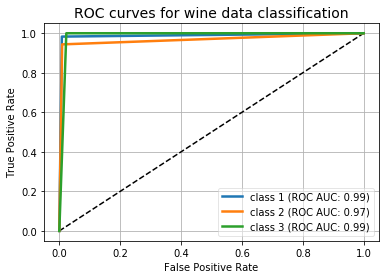

In [32]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_params = dict(max_depth=range(3,10), min_samples_leaf=range(1,5))
rf_best_params, rf_stats = gs(rf, rf_params)


In [33]:
rf_best_params

{'max_depth': 8, 'min_samples_leaf': 3}

In [34]:
rf_stats

{'accuracy': 0.9719101123595506, 'cm': array([[58,  1,  0],
        [ 1, 67,  3],
        [ 0,  0, 48]], dtype=int64), 'f1_score': 0.9719101123595506}

## Shallow Neural Network
With single hidden layer

c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin



9it [00:05,  1.48it/s]2019-11-09 10:32:07 LAPTOP-0NHMJ67U aux_functions[8800] DEBUG Cross-validation round 9 with 161 train samples and 17 test samples
2019-11-09 10:32:07 LAPTOP-0NHMJ67U aux_functions[8800] DEBUG Test indices: [  9  21  36  39  47  58  67  70  81  87  88 103 117 140 167 169 172]
c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


10it [00:06,  1.48it/s]


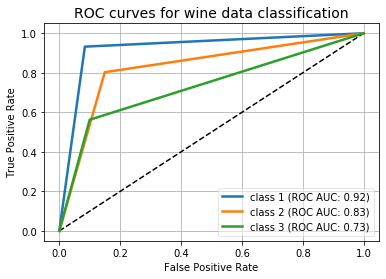

({'alpha': 0.001, 'hidden_layer_sizes': (500,)},
 {'accuracy': 0.7808988764044944, 'cm': array([[55,  2,  2],
         [ 3, 57, 11],
         [ 7, 14, 27]], dtype=int64), 'f1_score': 0.7808988764044944})

In [35]:
snn = MLPClassifier()
snn_params = dict(hidden_layer_sizes=[(100,), (200,), (500,)], alpha=[0.001, 0.0001, 0.00001])
gs(snn, snn_params)

### Deep Neural Network

In [ ]:
dnn = MLPClassifier()
dnn_params = dict(hidden_layer_sizes=[100*(10,), 50*(20,), 20*(50,)], alpha=[0.001, 0.0001, 0.00001])
gs(dnn, dnn_params)
